<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/cc-logo-square.png" width="200" alt="cognitiveclass.ai logo" />


<h1>Linear Regression Multiple Outputs</h1> 


<h2>Objective</h2><ul><li> How to create a complicated models using pytorch build in functions.</li></ul> 


<h2>Table of Contents</h2>
In this lab, you will create a model the Pytroch way. This will help you as models get more complicated.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Make Some Data</a></li>
<li><a href="#ref1">Create the Model and Cost Function the Pytorch way</a></li>
<li><a href="#ref2">Train the Model: Batch Gradient Descent</a></li>
<li><a href="#ref3">Practice Questions </a></li>
<br>
<p></p>
Estimated Time Needed: <strong>20 min</strong>
</div>

<hr>


Import the following libraries:  


In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

Set the random seed:


In [6]:
torch.manual_seed(1)

<a id="ref0"></a>

<h2 align=center>Make Some Data </h2>
Create a dataset class with two-dimensional features and two targets: 


In [7]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

create a dataset object 


In [8]:
data_set=Data()

In [9]:
data_set[:]

(tensor([[-1.0000e+00, -1.0000e+00],
         [-9.0000e-01, -9.0000e-01],
         [-8.0000e-01, -8.0000e-01],
         [-7.0000e-01, -7.0000e-01],
         [-6.0000e-01, -6.0000e-01],
         [-5.0000e-01, -5.0000e-01],
         [-4.0000e-01, -4.0000e-01],
         [-3.0000e-01, -3.0000e-01],
         [-2.0000e-01, -2.0000e-01],
         [-1.0000e-01, -1.0000e-01],
         [-2.9802e-09, -2.9802e-09],
         [ 1.0000e-01,  1.0000e-01],
         [ 2.0000e-01,  2.0000e-01],
         [ 3.0000e-01,  3.0000e-01],
         [ 4.0000e-01,  4.0000e-01],
         [ 5.0000e-01,  5.0000e-01],
         [ 6.0000e-01,  6.0000e-01],
         [ 7.0000e-01,  7.0000e-01],
         [ 8.0000e-01,  8.0000e-01],
         [ 9.0000e-01,  9.0000e-01]]),
 tensor([[-1.0015e+00, -3.0015e+00],
         [-8.0075e-01, -2.8008e+00],
         [-6.0065e-01, -2.6007e+00],
         [-4.0161e-01, -2.4016e+00],
         [-1.9913e-01, -2.1991e+00],
         [ 2.4440e-04, -1.9998e+00],
         [ 1.9934e-01, -1.8007e+00],

<a id="ref1"></a>

<h2 align=center>Create the Model, Optimizer, and Total Loss Function (cost)</h2>


Create a custom module:


In [10]:
class linear_regression(nn.Module):
    def __init__(self,input_size,output_size):
        super(linear_regression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

Create an optimizer object and set the learning rate to 0.1. **Don't forget to enter the model parameters in the constructor.**  


In [11]:
model=linear_regression(2,2)

Create an optimizer object and set the learning rate to 0.1. **Don't forget to enter the model parameters in the constructor.**  


<img src = "https://ibm.box.com/shared/static/f8hskuwrnctjg21agud69ddla0jkbef5.png" width = 100, align = "center">


In [12]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

Create the criterion function that calculates the total loss or cost:


In [13]:
criterion = nn.MSELoss()

Create a data loader object and set the batch_size to 5:


In [27]:
train_loader=DataLoader(dataset=data_set,batch_size=5)

<a id="ref2"></a>

<h2 align=center>Train the Model via Mini-Batch Gradient Descent </h2>


Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration. Remember that this is an approximation of the true total loss or cost.


In [28]:
LOSS=[]
 
epochs=100
   
for epoch in range(epochs):
    for x,y in train_loader:
        #make a prediction 
        yhat=model(x)
        print('Prediction in epoch %2d: ' % epoch,yhat.detach().numpy())
        #calculate the loss
        loss=criterion(yhat,y)
        #store loss/cost 
        LOSS.append(loss.item())
        #clear gradient 
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()
     


    

Prediction in epoch  0:  [[-1.0005081  -3.0005078 ]
 [-0.80045366 -2.8004532 ]
 [-0.600399   -2.6003988 ]
 [-0.4003445  -2.4003441 ]
 [-0.20028996 -2.2002897 ]]
Prediction in epoch  0:  [[-3.0255318e-04 -2.0003023e+00]
 [ 1.9975871e-01 -1.8002410e+00]
 [ 3.9981997e-01 -1.6001799e+00]
 [ 5.9988129e-01 -1.4001186e+00]
 [ 7.9994255e-01 -1.2000573e+00]]
Prediction in epoch  0:  [[ 1.0000618  -0.9999381 ]
 [ 1.2001204  -0.7998794 ]
 [ 1.4001793  -0.5998206 ]
 [ 1.600238   -0.39976186]
 [ 1.8002968  -0.19970316]]
Prediction in epoch  0:  [[2.0003290e+00 3.2919645e-04]
 [2.2003849e+00 2.0038503e-01]
 [2.4004407e+00 4.0044075e-01]
 [2.6004963e+00 6.0049659e-01]
 [2.8005519e+00 8.0055219e-01]]
Prediction in epoch  1:  [[-1.0005181  -3.0005178 ]
 [-0.8004627  -2.8004622 ]
 [-0.6004076  -2.6004071 ]
 [-0.40035224 -2.400352  ]
 [-0.20029712 -2.2002969 ]]
Prediction in epoch  1:  [[-3.0755997e-04 -2.0003073e+00]
 [ 1.9975424e-01 -1.8002456e+00]
 [ 3.9981604e-01 -1.6001840e+00]
 [ 5.9987783e-01 -1.4

Prediction in epoch 31:  [[-1.0005401  -3.0005403 ]
 [-0.8004831  -2.8004835 ]
 [-0.60042644 -2.6004267 ]
 [-0.40036952 -2.4003696 ]
 [-0.20031273 -2.2003129 ]]
Prediction in epoch 31:  [[-3.1799078e-04 -2.0003181e+00]
 [ 1.9974512e-01 -1.8002549e+00]
 [ 3.9980823e-01 -1.6001918e+00]
 [ 5.9987140e-01 -1.4001286e+00]
 [ 7.9993451e-01 -1.2000655e+00]]
Prediction in epoch 31:  [[ 1.0000569  -0.99994326]
 [ 1.2001173  -0.79988277]
 [ 1.400178   -0.5998222 ]
 [ 1.6002384  -0.39976168]
 [ 1.8002989  -0.19970119]]
Prediction in epoch 31:  [[2.0003333e+00 3.3307076e-04]
 [2.2003908e+00 2.0039070e-01]
 [2.4004483e+00 4.0044820e-01]
 [2.6005058e+00 6.0050583e-01]
 [2.8005633e+00 8.0056334e-01]]
Prediction in epoch 32:  [[-1.0005401  -3.0005403 ]
 [-0.8004831  -2.8004835 ]
 [-0.60042644 -2.6004267 ]
 [-0.40036952 -2.4003696 ]
 [-0.20031273 -2.2003129 ]]
Prediction in epoch 32:  [[-3.1799078e-04 -2.0003181e+00]
 [ 1.9974512e-01 -1.8002549e+00]
 [ 3.9980823e-01 -1.6001918e+00]
 [ 5.9987140e-01 -1.4

Prediction in epoch 52:  [[-3.1799078e-04 -2.0003181e+00]
 [ 1.9974512e-01 -1.8002549e+00]
 [ 3.9980823e-01 -1.6001918e+00]
 [ 5.9987140e-01 -1.4001286e+00]
 [ 7.9993451e-01 -1.2000655e+00]]
Prediction in epoch 52:  [[ 1.0000569  -0.99994326]
 [ 1.2001173  -0.79988277]
 [ 1.400178   -0.5998222 ]
 [ 1.6002384  -0.39976168]
 [ 1.8002989  -0.19970119]]
Prediction in epoch 52:  [[2.0003333e+00 3.3307076e-04]
 [2.2003908e+00 2.0039070e-01]
 [2.4004483e+00 4.0044820e-01]
 [2.6005058e+00 6.0050583e-01]
 [2.8005633e+00 8.0056334e-01]]
Prediction in epoch 53:  [[-1.0005401  -3.0005403 ]
 [-0.8004831  -2.8004835 ]
 [-0.60042644 -2.6004267 ]
 [-0.40036952 -2.4003696 ]
 [-0.20031273 -2.2003129 ]]
Prediction in epoch 53:  [[-3.1799078e-04 -2.0003181e+00]
 [ 1.9974512e-01 -1.8002549e+00]
 [ 3.9980823e-01 -1.6001918e+00]
 [ 5.9987140e-01 -1.4001286e+00]
 [ 7.9993451e-01 -1.2000655e+00]]
Prediction in epoch 53:  [[ 1.0000569  -0.99994326]
 [ 1.2001173  -0.79988277]
 [ 1.400178   -0.5998222 ]
 [ 1.6002

Prediction in epoch 78:  [[-1.0005401  -3.0005403 ]
 [-0.8004831  -2.8004835 ]
 [-0.60042644 -2.6004267 ]
 [-0.40036952 -2.4003696 ]
 [-0.20031273 -2.2003129 ]]
Prediction in epoch 78:  [[-3.1799078e-04 -2.0003181e+00]
 [ 1.9974512e-01 -1.8002549e+00]
 [ 3.9980823e-01 -1.6001918e+00]
 [ 5.9987140e-01 -1.4001286e+00]
 [ 7.9993451e-01 -1.2000655e+00]]
Prediction in epoch 78:  [[ 1.0000569  -0.99994326]
 [ 1.2001173  -0.79988277]
 [ 1.400178   -0.5998222 ]
 [ 1.6002384  -0.39976168]
 [ 1.8002989  -0.19970119]]
Prediction in epoch 78:  [[2.0003333e+00 3.3307076e-04]
 [2.2003908e+00 2.0039070e-01]
 [2.4004483e+00 4.0044820e-01]
 [2.6005058e+00 6.0050583e-01]
 [2.8005633e+00 8.0056334e-01]]
Prediction in epoch 79:  [[-1.0005401  -3.0005403 ]
 [-0.8004831  -2.8004835 ]
 [-0.60042644 -2.6004267 ]
 [-0.40036952 -2.4003696 ]
 [-0.20031273 -2.2003129 ]]
Prediction in epoch 79:  [[-3.1799078e-04 -2.0003181e+00]
 [ 1.9974512e-01 -1.8002549e+00]
 [ 3.9980823e-01 -1.6001918e+00]
 [ 5.9987140e-01 -1.4

Plot the cost:


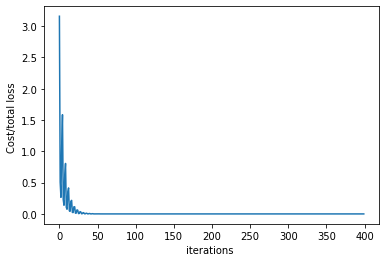

In [11]:
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />
</a>


### About the Authors:

 [Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork-20647811&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork-20647811&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](https://www.linkedin.com/in/michelleccarey?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork-20647811&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) 


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-23        | 2.0     | Shubham    | Migrated Lab to Markdown and added to course repo in GitLab |


Copyright © 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.


v
